# LLaVA with Ollama

This example shows how to use the Ollama Python library to run LLaVA, a vision-language model that understands both text and images. With Ollama, you can easily run LLaVA locally for tasks like image captioning and visual question answering.

Prerequisites:
- Ollama must be installed and running locally
- The desired Llama models must be pulled using Ollama (e.g., `ollama pull llava:7b`)


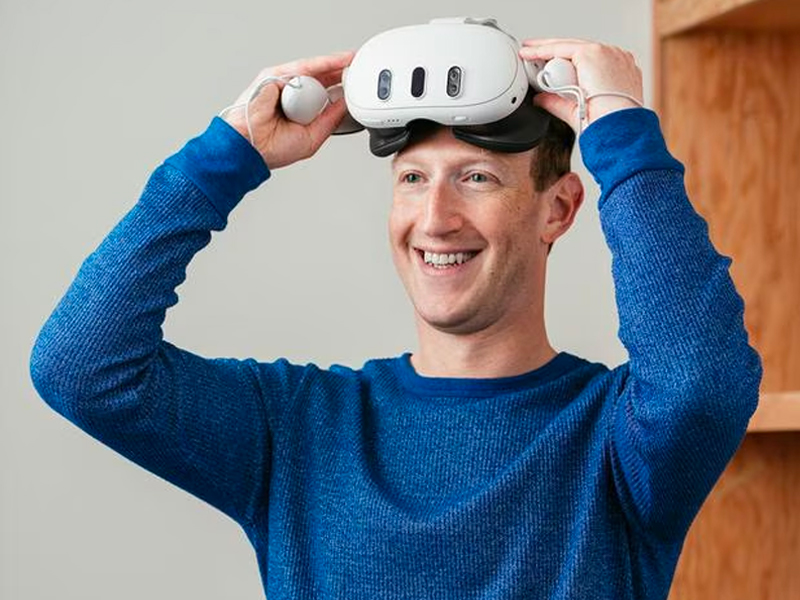

In [1]:
import ollama
from PIL import Image
import base64
from io import BytesIO
import requests

def encode_image_to_base64(image: Image.Image) -> str:
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")


def load_image(image_path_or_url: str) -> Image.Image:
    if image_path_or_url.startswith("http://") or image_path_or_url.startswith("https://"):
        response = requests.get(image_path_or_url)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    else:
        return Image.open(image_path_or_url)

def describe_image_with_model(model: str, prompt: str, encoded_image: str) -> str:
    res = ollama.chat(
        model=model,
        messages=[
            {
                'role': 'user',
                'content': prompt,
                'images': [encoded_image]
            }
        ]
    )
    return res['message']['content']

image_path_or_url = "https://ollama.com/public/blog/objectdetection.jpg"
image = load_image(image_path_or_url)
encoded_image = encode_image_to_base64(image)
image

## llava:7b

In [2]:
model = "llava:7b"
prompt = "Describe the picture in one sentence."
description = describe_image_with_model(model, prompt, encoded_image)
description

' A man wearing a VR headset is smiling and adjusting it on his face, with his hands on top of the device. '

## llava:34b

In [3]:
model = "llava:34b"
prompt = "Describe the picture in one sentence."
description = describe_image_with_model(model, prompt, encoded_image)
description

'The image shows a man wearing a virtual reality headset, smiling and holding his hands above it as if he is adjusting or removing the device.'